<a href="https://colab.research.google.com/github/grassifrancesco/Progetto-TPI-Analisi-Dati/blob/main/Progetto_TPI_Analisi_Dati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grafici emissioni di CO2**

In [22]:
import json
import requests
import matplotlib.pyplot as plt

res = requests.get("https://raw.githubusercontent.com/grassifrancesco/Progetto-TPI-Analisi-Dati/refs/heads/main/emissions.json")
dati = res.json()

dati_nazioni = {}

for naz in dati:
    try:
      if int(naz["Year"]) >= 1950:
        nazione = naz["Country"]
        if nazione not in dati_nazioni:
          dati_nazioni[nazione] = {}
        dati_nazioni[nazione]["anno"] = dati_nazioni[nazione].get("anno", []) + [int(naz["Year"])]
        dati_nazioni[nazione]["emissioni_totali"] = dati_nazioni[nazione].get("emissioni_totali", []) + [float(naz["Total"])]

        # Verifica se il valore di naz["Coal"] può essere convertito in float
        if naz["Coal"] == '' or naz["Coal"] is None:
          pass
        else:
          try:
            valore_carbone = float(naz["Coal"])
            dati_nazioni[nazione]["emissioni_carbone"] = dati_nazioni[nazione].get("emissioni_carbone", []) + [valore_carbone]
          except ValueError:
            print(f"Impossibile convertire {naz['Coal']} in float. Verifica il valore.")

        if naz["Oil"] == '' or naz["Oil"] is None:
          pass
        else:
          try:
            valore_petrolio = float(naz["Oil"])
            dati_nazioni[nazione]["emissioni_petrolio"] = dati_nazioni[nazione].get("emissioni_petrolio", []) + [valore_petrolio]
          except ValueError:
            print(f"Impossibile convertire {naz['Oil']} in float. Verifica il valore.")

        if naz["Gas"] == '' or naz["Gas"] is None:
          pass
        else:
          try:
            valore_gas = float(naz["Gas"])
            dati_nazioni[nazione]["emissioni_gas"] = dati_nazioni[nazione].get("emissioni_gas", []) + [valore_gas]
          except ValueError:
            print(f"Impossibile convertire {naz['Gas']} in float. Verifica il valore.")

        #dati_nazioni[nazione]["emissioni_carbone"] = dati_nazioni[nazione].get("emissioni_carbone", []) + [float(naz["Coal"])]
        #dati_nazioni[nazione]["emissioni_petrolio"] = dati_nazioni[nazione].get("emissioni_petrolio", []) + [float(naz["Oil"])]
        #dati_nazioni[nazione]["emissioni_gas"] = dati_nazioni[nazione].get("emissioni_gas", []) + [float(naz["Gas"])]
    except KeyError: # se un dato manca nel file json esso viene escluso
      pass

In [8]:
print(dati_nazioni)

{'Afghanistan': {'anno': [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], 'emissioni_totali': [0.084272, 0.0916, 0.0916, 0.106256, 0.106256, 0.153888, 0.1832, 0.29312, 0.32976, 0.384571, 0.413885, 0.490798, 0.688594, 0.706736, 0.838551, 1.006917, 1.091159, 1.281865, 1.223391, 0.941232, 1.670397, 1.893554, 1.530347, 1.635454, 1.913152, 2.121383, 1.980859, 2.384175, 2.1533, 2.232754, 1.756302, 1.978463, 2.094581, 2.519954, 2.82154, 3.501422, 3.133645, 3.113826, 2.856896, 2.764855, 2.024326, 1.914301, 1.482054, 1.486943, 1.453829, 1.417327, 1.370104, 1.304152, 1.278504, 1.09164, 1.047128, 1.069098, 1.340995, 1.

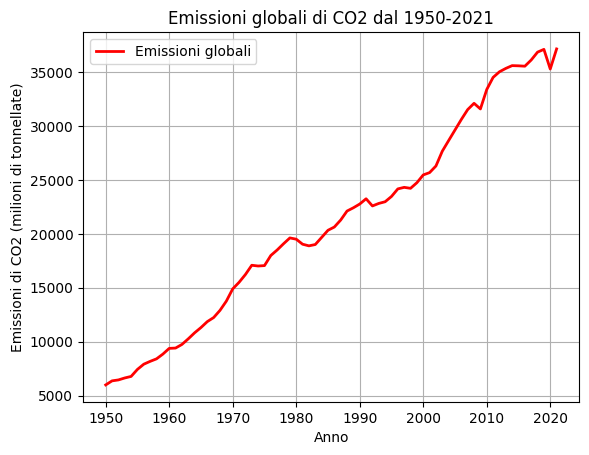

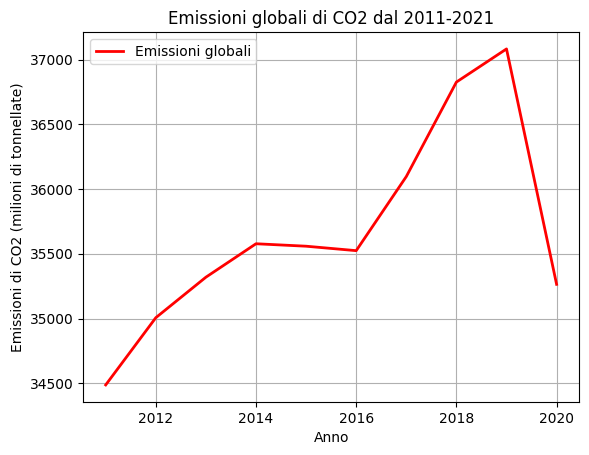

In [26]:
# crea un grafico che visualizza l'aumento globale dell'inquinamento dell'aria dal 1950 al 2021

plt.plot(dati_nazioni["Global"]["anno"], dati_nazioni["Global"]["emissioni_totali"], color='red', linewidth=2, label='Emissioni globali')
plt.xlabel("Anno")
plt.ylabel("Emissioni di CO2 (milioni di tonnellate)")
plt.title("Emissioni globali di CO2 dal 1950-2021")
plt.legend()
plt.grid(True)
plt.show() # da questo grafico si può notare un aumento lineare delle emissioni di CO2 nel mondo

plt.plot(dati_nazioni["Global"]["anno"][61:71], dati_nazioni["Global"]["emissioni_totali"][61:71], color='red', linewidth=2, label='Emissioni globali')
plt.xlabel("Anno")
plt.ylabel("Emissioni di CO2 (milioni di tonnellate)")
plt.title("Emissioni globali di CO2 dal 2011-2021")
plt.legend()
plt.grid(True)
plt.show()

Inserire il nome inglese di una nazione:Italy


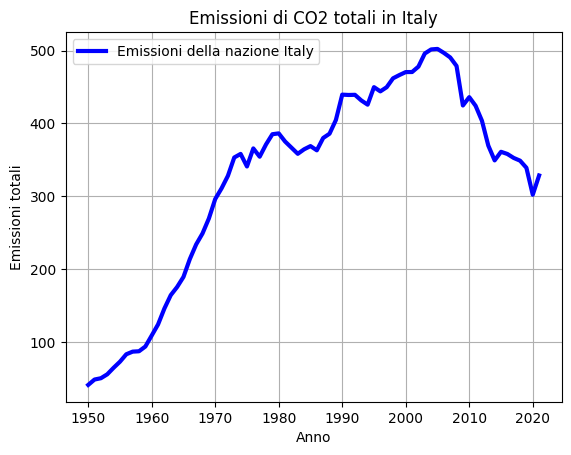

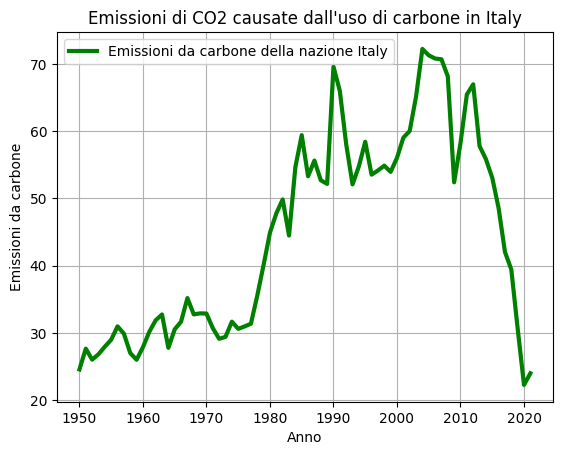

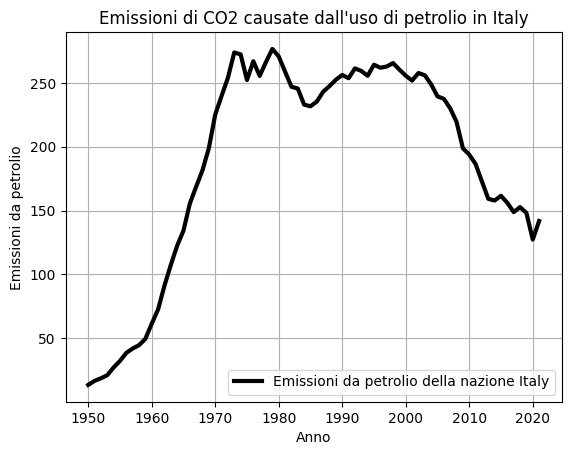

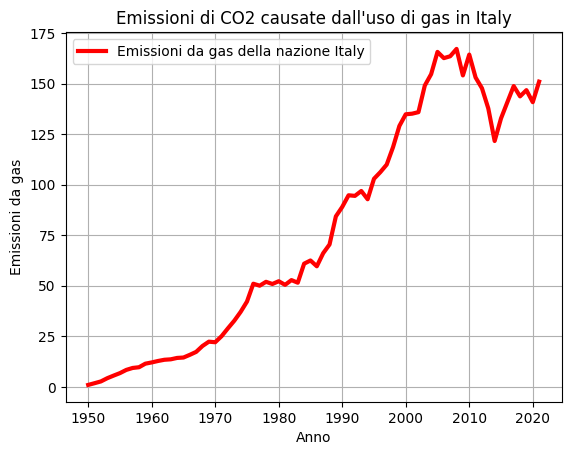

In [30]:
# crea un grafico che serve a visualizzare l'aumento delle emissioni di CO2 di una nazione passata come input dall'utente nel tempo

s = input("Inserire il nome inglese di una nazione:")

if s in dati_nazioni:
    plt.plot(dati_nazioni[s]["anno"], dati_nazioni[s]["emissioni_totali"], color='blue', linewidth=3, label=f"Emissioni della nazione {s}")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Anno")
    plt.ylabel("Emissioni totali")
    plt.title(f"Emissioni di CO2 totali in {s}")
    plt.show()

    plt.plot(dati_nazioni[s]["anno"], dati_nazioni[s]["emissioni_carbone"], color='green', linewidth=3, label=f"Emissioni da carbone della nazione {s}")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Anno")
    plt.ylabel("Emissioni da carbone")
    plt.title(f"Emissioni di CO2 causate dall'uso di carbone in {s}")
    plt.show()

    plt.plot(dati_nazioni[s]["anno"], dati_nazioni[s]["emissioni_petrolio"], color='black', linewidth=3, label=f"Emissioni da petrolio della nazione {s}")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Anno")
    plt.ylabel("Emissioni da petrolio")
    plt.title(f"Emissioni di CO2 causate dall'uso di petrolio in {s}")
    plt.show()

    plt.plot(dati_nazioni[s]["anno"], dati_nazioni[s]["emissioni_gas"], color='red', linewidth=3, label=f"Emissioni da gas della nazione {s}")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Anno")
    plt.ylabel("Emissioni da gas")
    plt.title(f"Emissioni di CO2 causate dall'uso di gas in {s}")
    plt.show()
else:
    print(f"La nazione {s} non è presente nei dati.")

# **Mappa index felicità mondiale**

In [31]:
import json
import requests
import folium
import pandas

dati = pandas.read_csv("https://raw.githubusercontent.com/grassifrancesco/Progetto-TPI-Analisi-Dati/refs/heads/main/world-happiness-report-2021.csv")

geojson_data = requests.get("https://raw.githubusercontent.com/python-visualization/folium-example-data/main/world_countries.json").json()

m = folium.Map([43, -100], zoom_start=4)

folium.Choropleth(
    geo_data = geojson_data,
    data = dati,
    columns = ["Country name", "Ladder score"],
    key_on = "properties.name",
    fill_color = "GnBu",
).add_to(m)

m